# Random walk

In [50]:
import sys
import numpy as np
import corner
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.random_walk_checkpointed import CheckpointedRandomWalk
from goldmine.inference.scandal_checkpointed import CheckpointedSCANDALInference

In [2]:
logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

In [17]:
def ccolor(val, vmin, vmax, cmap='viridis'):
    cmap = matplotlib.cm.get_cmap(cmap)
    return cmap((val - vmin) / (vmax - vmin)).reshape(-1,)

## Settings

In [53]:
n_sim = 10000
n_plot = 20

theta0 = 80.
theta1 = 150.

## Simulate random walk

In [4]:
sim = CheckpointedRandomWalk()
x0, t_xz0, z_checkpoints0, t_xz_checkpoints0, z0 = sim.rvs_score([theta0], [100.], n_sim, return_histories=True)
x1, t_xz1, z_checkpoints1, t_xz_checkpoints1, z1 = sim.rvs_score([theta1], [100.], n_sim, return_histories=True)

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [59]:
z_checkpoints0 = z_checkpoints0.astype(np.float)
z_checkpoints1 = z_checkpoints1.astype(np.float)

## Plot random walks

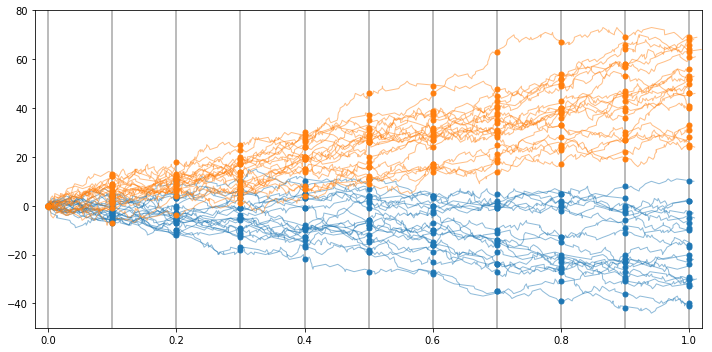

In [35]:
checkpoints = np.linspace(0.,1.,11)
xmin, xmax = -50, 80

fig = plt.figure(figsize=(10,5))

# Checkpoints
for t_checkpoint in checkpoints:
    plt.plot(
        [t_checkpoint, t_checkpoint], [xmin, xmax],
        ls='-',
        c='0.65',
        lw=1.5
    )
    
# Trajectories from theta0
for z in z0[:n_plot]:
    plt.plot(
        np.array(z)[:,0], np.array(z)[:,1],
        ls='-',c='C0', lw=1., alpha=0.5
    )
    
# Trajectories from theta1
for z in z1[:n_plot]:
    plt.plot(
        np.array(z)[:,0], np.array(z)[:,1],
        ls='-', c='C1',lw=1., alpha=0.5
    )
    
# Checkpoints from theta0
for z in z_checkpoints0[:n_plot]:
    plt.plot(
        checkpoints, z,
        marker='o', ms=5., ls=' ', c='C0', alpha=1.
    )
    
# Checkpoints from theta1
for z in z_checkpoints1[:n_plot]:
    plt.plot(
        checkpoints, z,
        marker='o', ms=5., ls=' ', c='C1', alpha=1.
    )
    
plt.xlim(-0.02,1.02)
plt.ylim(xmin, xmax)

plt.xlabel('t')
plt.ylabel('x')
    
plt.tight_layout()
plt.show()

## Plot joint scores

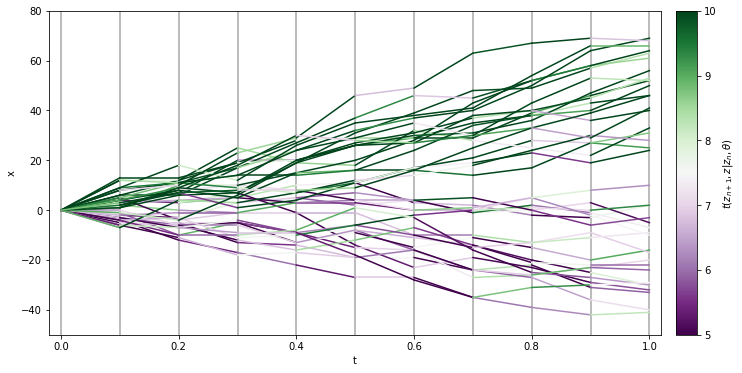

In [49]:
checkpoints = np.linspace(0.,1.,11)
xmin, xmax = -50, 80
vmax = 0.05

fig = plt.figure(figsize=(10,5))
ax0 = fig.add_axes([0.05, 0.05, 0.85, 0.9])

# Checkpoints
for t_checkpoint in checkpoints:
    plt.plot(
        [t_checkpoint, t_checkpoint], [xmin, xmax],
        ls='-',
        c='0.65',
        lw=1.5
    )
    
    
# Joint scores for theta0 trajectories
for z, t in zip(z_checkpoints0[:n_plot], t_xz_checkpoints0[:n_plot]):
    for i in range(len(checkpoints) - 1):
        plt.plot(
            [checkpoints[i], checkpoints[i+1]], [z[i], z[i+1]],
            c=ccolor(t[i+1], -vmax, vmax, 'PRGn'),
            ls='-', lw=1.5, alpha=1.
        )
    
# Joint scores for theta1 trajectories
for z, t in zip(z_checkpoints1[:n_plot], t_xz_checkpoints1[:n_plot]):
    for i in range(len(checkpoints) - 1):
        plt.plot(
            [checkpoints[i], checkpoints[i+1]], [z[i], z[i+1]],
            c=ccolor(t[i+1], -vmax, vmax, 'PRGn'),
            ls='-', lw=1.5, alpha=1.
        )
    
plt.xlim(-0.02,1.02)
plt.ylim(xmin, xmax)

plt.xlabel('t')
plt.ylabel('x')

# Color bar
ax1 = fig.add_axes([0.92, 0.05, 0.03, 0.9])
cb = matplotlib.colorbar.ColorbarBase(
    ax1, cmap=matplotlib.cm.get_cmap("PRGn"),
    norm=matplotlib.colors.Normalize(vmin=5, vmax=10),
    orientation='vertical'
)
cb.set_label(r'$t(z_{n+1}, z | z_n, \theta)$')
    
plt.tight_layout()
plt.show()

## Train SCANDAL

In [52]:
inf = CheckpointedSCANDALInference(
    n_parameters=1,
    n_observables=1,
    n_latent=1,
    n_components=1,
    n_mades=1,
    n_made_hidden_layers=1,
    n_made_units_per_layer=20,
    activation='relu',
    batch_norm=False,
    n_step_hidden_layers=1,
    n_step_units_per_layer=20,
    step_activation='relu'
)

13:30  Initialized checkpointed NDE (MAF) with the following settings:
13:30    Parameters:        1
13:30    Observables:       1
13:30    Latent vars:       1
13:30    Checkpoint score estimator:
13:30      Hidden layers:   1
13:30      Units:           20
13:30      Activation:      relu
13:30    Global flow:
13:30      Base components: 1
13:30      MADEs:           1
13:30      Hidden layers:   1
13:30      Units:           20
13:30      Activation:      relu
13:30      Batch norm:      False


In [ ]:
inf.fit(
    theta=theta0 * np.ones_like(t_xz0),
    x=x0,
    t_xz=t_xz0,
    t_xz_checkpoints=t_xz_checkpoints0,
    z_checkpoints=z_checkpoints0[:,:,np.newaxis],
    alpha=1.,
    beta=1000.,
)

13:38  Training checkpointed SCANDAL with settings:
13:38    alpha:                  1.0
13:38    beta:                   1000.0
13:38    theta given:            True
13:38    theta1 given:           False
13:38    x given:                True
13:38    y given:                False
13:38    r_xz given:             False
13:38    t_xz given:             True
13:38    z_checkpoints given:    True
13:38    r_xz_checkpoints given: False
13:38    t_xz_checkpoints given: True
13:38    Samples:                10000
13:38    Parameters:             1
13:38    Obserables:             1
13:38    Checkpoints:            11
13:38    Latent variables:       1
13:38    Batch size:             64
13:38    Optimizer:              adam
13:38    Learning rate:          0.001 initially, decaying to 0.0001
13:38    Valid. split:           0.2
13:38    Early stopping:         True
13:38    Epochs:                 50
13:38  Starting training
